In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

In [3]:
# Data explor

In [4]:
import seaborn as sns
def data_prep(df):
  df.shape
  df.isna().sum()
  df.info()
  sns.countplot(x=df["Volume"], data=df)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-13,283.589996,289.899994,283.170013,289.839996,287.480530,24222700
1,2023-04-14,287.000000,288.480011,283.690002,286.140015,283.810699,20987900
2,2023-04-17,289.929993,291.600006,286.160004,288.799988,286.448975,23836200
3,2023-04-18,291.570007,291.760010,287.010010,288.369995,286.022522,20161800
4,2023-04-19,285.989990,289.049988,284.540009,288.450012,286.101898,17150300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


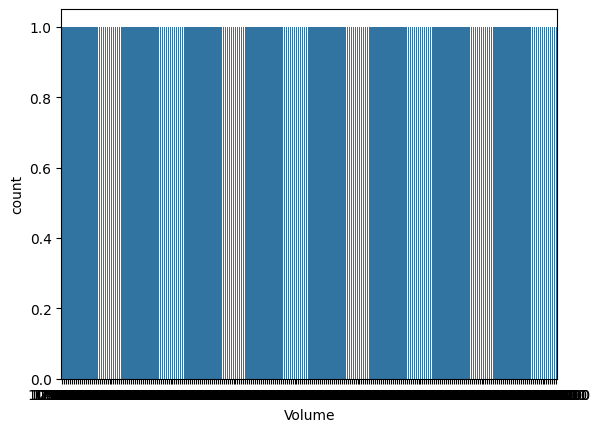

In [6]:
data_prep(df)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,355.358135,358.383890,352.327738,355.534445,354.315058,2.490091e+07
std,39.057236,38.975063,38.884755,39.094193,39.768204,9.511700e+06
min,279.510010,281.600006,275.369995,275.420013,273.177979,1.017660e+07
25%,326.132507,329.962494,323.775001,327.195008,325.687493,1.950010e+07
50%,339.440002,342.860000,336.785004,340.125000,338.093674,2.248595e+07
75%,385.617492,389.037491,381.447502,385.590004,384.878273,2.701165e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


In [8]:
drop = ['Date']
df = df.drop(columns=drop)

In [9]:
# data visualization

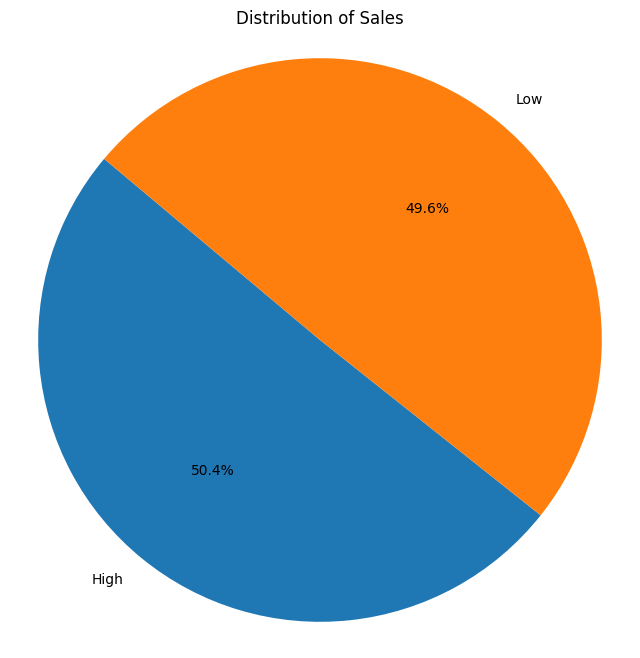

In [10]:
import matplotlib.pyplot as plt

a = df[['High', 'Low']].sum()

plt.figure(figsize=(8, 8))
plt.pie(a, labels=a.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales')
plt.axis('equal')
plt.show()

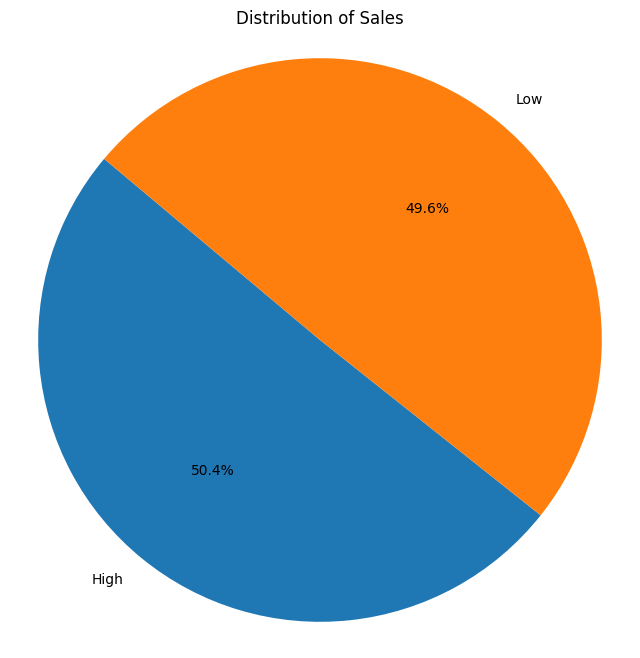

In [11]:
sales_by_medium = df[['Close', 'Adj Close']].sum()

plt.figure(figsize=(8, 8))
plt.pie(a, labels=a.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales')
plt.axis('equal')
plt.show()

In [12]:
# Here is used decison tree model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred = model.predict(X_test)

In [16]:
predictions = model.predict(X_test)

In [17]:
r2 = r2_score(y_test, predictions)

In [18]:
mse = mean_squared_error(y_test, y_pred)

In [19]:
print(f"R2 score is {r2}")

R2 score is 0.9880583880523071


In [20]:
print(f"Mean squared error {mse}")

Mean squared error 15.83197179935538


In [21]:
# here is used linear regression model

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
predictions = model.predict(X_test)

In [27]:
r2 = r2_score(y_test, predictions)

In [28]:
mse = mean_squared_error(y_test, y_pred)

In [29]:
print(mse)

0.1298484187585422


In [30]:
print(r2)

0.9999020589823878


In [31]:
# decision tree with different split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Open', 'High', 'Low', 'Adj Close', 'Close']]
y = df['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred = model.predict(X_test)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, y_pred)

In [35]:
print(f"mean squared error is {mse}")

mean squared error is 179111280767843.12


In [36]:
print(f"r2 is {r2}")

r2 is -0.28540387075722173


In [37]:
# Random forest regressor

In [38]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data for demonstration
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 2621.793155098221
